Project Summary

Trip duration is the most fundamental measure in all modes of transportation. Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems. In order to predict the trip duration, data mining techniques are employed in this project to predict the trip duration of rental bikes in Seoul Bike sharing system. The prediction is carried out with the combination of Seoul Bike data and weather data.

Please use the Seoul Bike dataset

What are the factors that influence the number of bikes rented?
Explore the data for outliers and missing values.
Plot the correlation between the variables and state your comments
Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.
Coment on Model performance by using approapriate diagnostics and measures.

**Import Libraries**

In [71]:
import pandas as pd
import numpy as np

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt


**Read Data**

What are the factors that influence the number of bikes rented?

---





In [73]:
df = pd.read_csv("SeoulBikeData.csv")
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Data Cleaning**

Explore the data for outliers and missing values.


In [74]:
miss_val = df.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

Plot the correlation between the variables and state your comments

**Find Corelation**

In [75]:
corr = df.corr()
data_corr = df.corr()
data_corr.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554


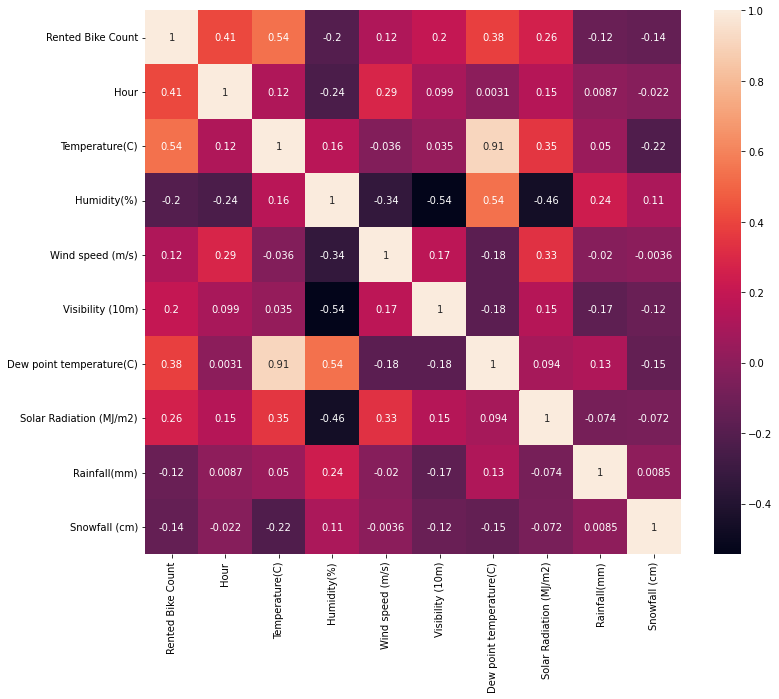

In [76]:
plt.figure(figsize=(12,10))
sns.heatmap(data_corr, annot = True)

**Slit Data into input and output(train and test)**

**Please** build a linear regression model to predict rented bike count by choosing appropriate independent variables.


In [77]:
x= df.drop(['Rented Bike Count'], axis =1)

In [78]:
x.head()

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [79]:
x= x.drop(['Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)
x.head()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [80]:
y =df['Rented Bike Count']
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

**Import ml model from sklearn**

In [81]:
from sklearn.model_selection import train_test_split

*   **Train Data**
*   **Accuracy Score**

In [82]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7008, 9)
(1752, 9)
(7008,)
(1752,)


In [83]:
x_test.head()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
1272,0,-5.3,77,3.8,894,-8.7,0.00,0.0,1.0
659,11,-2.1,34,1.0,1868,-15.8,0.65,0.0,0.0
1862,14,4.2,18,3.3,1976,-18.0,2.25,0.0,0.0
4957,13,31.2,36,2.0,1022,14.3,2.91,0.0,0.0
3503,23,14.0,45,0.6,1901,2.2,0.00,0.0,0.0


Coment on Model performance by using approapriate diagnostics and measures.

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
model = LinearRegression()

In [86]:
model.fit(x_train, y_train)

LinearRegression()

In [87]:
pred= model.predict(x_test)
pred

array([-254.05173411,  406.08217726,  664.82475744, ..., 1351.16050332,
       1748.26871507,  400.9381152 ])

In [88]:
model.score(x_test,y_test)

0.45578302356687905

Import Libraries


*  pandas 
*  Numpy 


*   matplotlib
*   seaborn





Read Dataset 


*   read
*   data .info()


*   data .describe()
*   data.shape




Missing Values 

- data .isna().sum()
- Replace/ drop missing values 

Replace categorical data into numerical data 
- dummy variable 
- replace method
- one hot encoding 

Find correlation
- eliminate if columns are weekly correlated 
- EDA 

Divide data into input and output 
split data into training and testing 

Import ml model from sklearn 

train data 
predict output 
check accuracy score 